# Machine Learning II (Labs01)
## Classification Task 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix


In [3]:

pd.set_option("display.max_columns", 500)

# Basic EDA

In [4]:
data_sets = ['train', 'test']
for d in data_sets:
    file_path = f"/Users/shah/CODE_BOOK_3/ML-in-Finance-I-case-study-forecasting-tax-avoidance-rates/data/output/{d}_fe.csv"
    globals()[f"{d}"] = pd.read_csv(file_path)


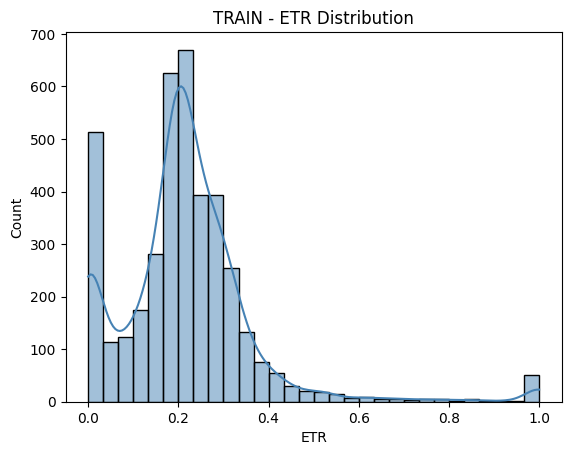

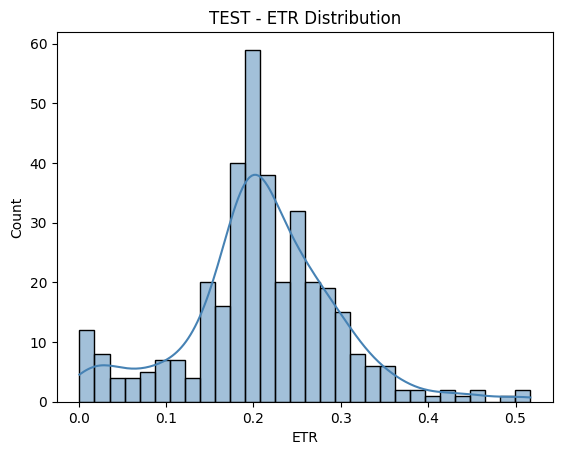

In [ ]:
# Distribution of ETR
for d in data_sets:
    df = globals()[d]
    sns.histplot(df['etr'], bins=30, kde=True, color='steelblue')
    plt.title(f"{d.upper()} - ETR Distribution")
    plt.xlabel('ETR')
    plt.ylabel('Count')
    plt.show()


In [5]:

list(train.columns)


['Unnamed: 0',
 'Ticker',
 'Nazwa2',
 'rok',
 'ta',
 'txt',
 'pi',
 'str',
 'xrd',
 'ni',
 'ppent',
 'intant',
 'dlc',
 'dltt',
 'capex',
 'revenue',
 'cce',
 'adv',
 'etr',
 'diff',
 'roa',
 'lev',
 'intan',
 'rd',
 'ppe',
 'sale',
 'cash_holdings',
 'adv_expenditure',
 'capex2',
 'cfc',
 'dta',
 'capex2_scaled',
 'y_v2x_polyarchy',
 'y_e_p_polity',
 'y_BR_Democracy',
 'WB_GDPgrowth',
 'WB_GDPpc',
 'WB_Inflation',
 'rr_per_country',
 'rr_per_sector',
 'sektor_consumer discretionary',
 'sektor_consumer staples',
 'sektor_energy',
 'sektor_health care',
 'sektor_industrials',
 'sektor_materials',
 'sektor_real estate',
 'sektor_technology',
 'sektor_utilities',
 'gielda_2',
 'gielda_3',
 'gielda_4',
 'gielda_5',
 'ta_log',
 'txt_cat_(-63.011, -34.811]',
 'txt_cat_(-34.811, 0.488]',
 'txt_cat_(0.488, 24.415]',
 'txt_cat_(24.415, 25.05]',
 'txt_cat_(25.05, 308.55]',
 'txt_cat_(308.55, 327.531]',
 'txt_cat_(327.531, inf]',
 'pi_cat_(-8975.0, -1.523]',
 'pi_cat_(-1.523, 157.119]',
 'pi_cat_

In [27]:
df = train
corr = df.corr(numeric_only=True)['etr'].sort_values(ascending=False)
print(f"\nTop correlations with ETR ({d.upper()}):")
print(corr.head(10))



Top correlations with ETR (TEST):
etr                              1.000000
etr_y_ma                         0.363955
etr_y_past                       0.301349
WB_GDPpc                         0.230497
str_cat_(0.28, inf]              0.230082
cfc                              0.224364
str                              0.223848
xrd_exists                       0.181687
ta_log                           0.177818
revenue_cat_(0.174, 1248.817]   -0.205432
Name: etr, dtype: float64


Safe correlation ranges, we can move forward

# Generating Classes

In [ ]:
# we may use np.select([,] , [,]) for data's class column
# Create target
for d in data_sets:
    globals()[d]['class']= np.select(
        [globals()[d]['etr'] > 0.25, (globals()[d]['etr'] > 0.15) & (globals()[d]['etr'] <= 0.25), globals()[d]['etr'] <= 0.15],
        [0, 1, 2]
    )


In [7]:
# Checking class balance
print(train['class'].value_counts())

class
1    1668
0    1267
2    1058
Name: count, dtype: int64


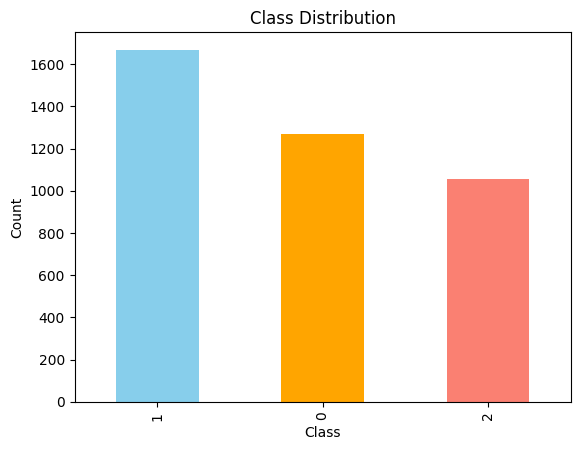

In [8]:
# Visualize
train['class'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


The class distribution shows most firms fall into Medium Tax Avoidance (Class 1)

In [9]:

for d in data_sets:
    globals()[d] = globals()[d].select_dtypes(include='number')


# Feature Selection

In [10]:
# best features
from sklearn.feature_selection import SelectKBest, f_classif

X = train.drop(['etr', 'class',], axis=1)
y = train['class']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['str', 'cfc', 'WB_GDPpc', 'ta_log', 'str_cat_(0.0875, 0.192]',
       'str_cat_(0.28, inf]', 'xrd_exists', 'revenue_cat_(0.174, 1248.817]',
       'etr_y_past', 'etr_y_ma'],
      dtype='object')


/Users/shah/CODE_BOOK_3/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/shah/CODE_BOOK_3/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [11]:

for d in data_sets:
    globals()[d] = globals()[d][selected_features.to_list() + ['etr', 'class']]


# Modelling

In [13]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
X_train = train.drop(['etr', 'class'], axis=1)
y_train = train['class']

X_test = test.drop(['etr','class'], axis=1)
y_test = test['class']
# X = dff.drop(['etr','class'], axis=1)
# y = dff['class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)
models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}


In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')

    print(f'\nModel: {name}')
    print(f'Accuracy: {acc:.3f}')
    print(f'Precision (macro): {prec:.3f}')
    print(f'Recall (macro): {rec:.3f}')
    print(f'F1-score (macro): {f1:.3f}')
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


/Users/shah/CODE_BOOK_3/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model: LogisticRegression
Accuracy: 0.570
Precision (macro): 0.544
Recall (macro): 0.561
F1-score (macro): 0.545

Confusion Matrix:
[[ 64  26  13]
 [ 56 111  28]
 [ 17  16  32]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.47      0.62      0.53       103
      Medium       0.73      0.57      0.64       195
        High       0.44      0.49      0.46        65

    accuracy                           0.57       363
   macro avg       0.54      0.56      0.55       363
weighted avg       0.60      0.57      0.58       363


Model: KNN
Accuracy: 0.590
Precision (macro): 0.535
Recall (macro): 0.538
F1-score (macro): 0.537

Confusion Matrix:
[[ 57  34  12]
 [ 33 132  30]
 [ 16  24  25]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.54      0.55      0.55       103
      Medium       0.69      0.68      0.69       195
        High       0.37      0.38      0.38        65

    accura

In [19]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Accuracy: 0.636


As we see, the model with the highest accuracy is the SVC model.


In [30]:
import os, pickle

best_model = models['SVC']
# saving
with open("models/best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)